In [1]:
## load useful libraries
suppressWarnings(suppressPackageStartupMessages(library(rhdf5)))
suppressWarnings(suppressPackageStartupMessages(library(qvalue)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(ggbeeswarm)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
suppressWarnings(suppressPackageStartupMessages(library(scater)))
suppressWarnings(suppressPackageStartupMessages(library(SingleCellExperiment)))
suppressWarnings(suppressPackageStartupMessages(library(edgeR)))
suppressWarnings(suppressPackageStartupMessages(library(limma)))
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(ISLR)))
suppressWarnings(suppressPackageStartupMessages(library(GGally)))
suppressWarnings(suppressPackageStartupMessages(library(scran)))
suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
suppressWarnings(suppressPackageStartupMessages(library(circlize)))

In [2]:
gtex_tagging_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/qtl_annotation/all_results_combined.tsv.all_gtex_gwas_tagging_annotations.1000g_ref.txt"

In [3]:
gtex_tagging_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/qtl_annotation/all_results_combined.tsv.all_gtex_gwas_tagging_annotations.hipsci_ref.txt"

In [4]:
gtex_tagging = read.csv(gtex_tagging_filename, sep = "\t")

In [73]:
head(gtex_tagging)

feature,snp_id,stage,beta.mean,beta_se,empirical_feature_p_value,p_value.mean,global_corr_p_value,snp_chromosome,snp_position,⋯,Thyroid_LD,Vagina_Variant,Vagina_Annotation,Vagina_LD,Whole_Blood_Variant,Whole_Blood_Annotation,Whole_Blood_LD,ipsc_hipsci_eqtls_mirauta2018_Variant,ipsc_hipsci_eqtls_mirauta2018_Annotation,ipsc_hipsci_eqtls_mirauta2018_LD
ENSG00000204531_POU5F1,6_31132414_G_A,ips,-1.386281,0.1083733,1.592971e-18,1.823854e-37,5.264237e-16,6,31132414,⋯,{0.6288177298202919};{0.3459942872930465},-,-,-,-,-,-,{6_31132414},{6_31132414_G_A-ENSG00000204531},{0.9999999999999999}
ENSG00000179344_HLA-DQB1,6_32634922_A_G,ips,-1.270786,0.1469673,1.977147e-11,5.299864e-18,1.340269e-09,6,32634922,⋯,{0.2607081350345517};{0.38871861172628047};{0.42296377583324346};{0.6683545422240447};{0.3016781046697814},{6_32501169};{6_32620344},{6_32501169_C_T_b37-ENSG00000196301};{6_32620344_G_A_b37-ENSG00000179344},{0.4149214159283577};{0.3016781046697814},{6_32608508};{6_32526526};{6_32627082};{6_32607558},{6_32608508_A_T_b37-ENSG00000196735};{6_32526526_A_G_b37-ENSG00000198502};{6_32627082_A_G_b37-ENSG00000223534};{6_32607558_A_G_b37-ENSG00000232629},{0.4062001050131084};{0.36551405659243374};{0.7164536068532416};{0.2915903443713935},-,-,-
ENSG00000179344_HLA-DQB1,6_32634922_A_G,mesendo,-1.375988,0.1478612,8.485500e-15,1.328104e-20,1.519887e-12,6,32634922,⋯,{0.2607081350345517};{0.38871861172628047};{0.42296377583324346};{0.6683545422240447};{0.3016781046697814},{6_32501169};{6_32620344},{6_32501169_C_T_b37-ENSG00000196301};{6_32620344_G_A_b37-ENSG00000179344},{0.4149214159283577};{0.3016781046697814},{6_32608508};{6_32526526};{6_32627082};{6_32607558},{6_32608508_A_T_b37-ENSG00000196735};{6_32526526_A_G_b37-ENSG00000198502};{6_32627082_A_G_b37-ENSG00000223534};{6_32607558_A_G_b37-ENSG00000232629},{0.4062001050131084};{0.36551405659243374};{0.7164536068532416};{0.2915903443713935},-,-,-
ENSG00000179344_HLA-DQB1,6_32634922_A_G,defendo,-1.438379,0.1499301,3.298243e-12,8.500689e-22,5.981274e-10,6,32634922,⋯,{0.2607081350345517};{0.38871861172628047};{0.42296377583324346};{0.6683545422240447};{0.3016781046697814},{6_32501169};{6_32620344},{6_32501169_C_T_b37-ENSG00000196301};{6_32620344_G_A_b37-ENSG00000179344},{0.4149214159283577};{0.3016781046697814},{6_32608508};{6_32526526};{6_32627082};{6_32607558},{6_32608508_A_T_b37-ENSG00000196735};{6_32526526_A_G_b37-ENSG00000198502};{6_32627082_A_G_b37-ENSG00000223534};{6_32607558_A_G_b37-ENSG00000232629},{0.4062001050131084};{0.36551405659243374};{0.7164536068532416};{0.2915903443713935},-,-,-
ENSG00000148291_SURF2,9_136227260_A_G,ips,-1.371767,0.1094063,1.461609e-19,4.608624e-36,5.796154e-17,9,136227260,⋯,{0.20259987278029382};{0.6086727911268079};{0.5583859019693831};{0.43589060630089066},-,-,-,{9_136205775},{9_136205775_T_C_b37-ENSG00000148297},{0.5877429781370492},{9_136214955};{9_136227260},{9_136214955_A_G-ENSG00000148297};{9_136227260_A_G-ENSG00000148291},{0.992130602668752};{0.9999999999999999}
ENSG00000148291_SURF2,9_136227260_A_G,mesendo,-1.410832,0.1143974,6.363028e-20,6.036677e-35,2.949861e-17,9,136227260,⋯,{0.20259987278029382};{0.6086727911268079};{0.5583859019693831};{0.43589060630089066},-,-,-,{9_136205775},{9_136205775_T_C_b37-ENSG00000148297},{0.5877429781370492},{9_136214955};{9_136227260},{9_136214955_A_G-ENSG00000148297};{9_136227260_A_G-ENSG00000148291},{0.992130602668752};{0.9999999999999999}


In [74]:
tissues = gsub("_LD","",colnames(gtex_tagging)[grep("LD",colnames(gtex_tagging))])
tissues

[1] "GWAS"                                 
 [2] "Artery_Aorta"                         
 [3] "Brain_Hypothalamus"                   
 [4] "Adipose_Visceral_Omentum"             
 [5] "Brain_Cerebellum"                     
 [6] "Brain_Nucleus_accumbens_basal_ganglia"
 [7] "Brain_Amygdala"                       
 [8] "Liver"                                
 [9] "Brain_Substantia_nigra"               
[10] "Minor_Salivary_Gland"                 
[11] "Brain_Cerebellar_Hemisphere"          
[12] "Brain_Caudate_basal_ganglia"          
[13] "Colon_Transverse"                     
[14] "Breast_Mammary_Tissue"                
[15] "Adipose_Subcutaneous"                 
[16] "Artery_Coronary"                      
[17] "Heart_Atrial_Appendage"               
[18] "Esophagus_Mucosa"                     
[19] "Esophagus_Muscularis"                 
[20] "Brain_Frontal_Cortex_BA9"             
[21] "Esophagus_Gastroesophageal_Junction"  
[22] "Adrenal_Gland"                        
[23] "Lung"                                 
[24] "Heart_Left_Ventricle"                 
[25] "Nerve_Tibial"                         
[26] "Brain_Putamen_basal_ganglia"          
[27] "Colon_Sigmoid"                        
[28] "Brain_Anterior_cingulate_cortex_BA24" 
[29] "Brain_Hippocampus"                    
[30] "Brain_Spinal_cord_cervical_c.1"       
[31] "Cells_EBV.transformed_lymphocytes"    
[32] "Muscle_Skeletal"                      
[33] "Cells_Transformed_fibroblasts"        
[34] "Brain_Cortex"                         
[35] "Ovary"                                
[36] "Pancreas"                             
[37] "Artery_Tibial"                        
[38] "Prostate"                             
[39] "Pituitary"                            
[40] "Skin_Not_Sun_Exposed_Suprapubic"      
[41] "Skin_Sun_Exposed_Lower_leg"           
[42] "Spleen"                               
[43] "Stomach"                              
[44] "Small_Intestine_Terminal_Ileum"       
[45] "Testis"                               
[46] "Uterus"                               
[47] "Thyroid"                              
[48] "Vagina"                               
[49] "Whole_Blood"                          
[50] "ipsc_hipsci_eqtls_mirauta2018"

In [75]:
cell_lines = c('Cells_EBV.transformed_lymphocytes','Cells_Transformed_fibroblasts')

ecto_tissues = c('Brain_Amygdala','Brain_Anterior_cingulate_cortex_BA24','Brain_Caudate_basal_ganglia',
                 'Brain_Cerebellar_Hemisphere','Brain_Cerebellum','Brain_Cortex','Brain_Frontal_Cortex_BA9',
                 'Brain_Hippocampus','Brain_Hypothalamus','Brain_Nucleus_accumbens_basal_ganglia',
                 'Brain_Putamen_basal_ganglia','Brain_Spinal_cord_cervical_c','Brain_Substantia_nigra',
                 #'Nerve_Tibial','Pituitary',
                 'Skin_Not_Sun_Exposed_Suprapubic','Skin_Sun_Exposed_Lower_leg',
                'Adipose_Subcutaneous')

meso_tissues = c('Muscle_Skeletal',
                 'Heart_Atrial_Appendage','Heart_Left_Ventricle',
                 'Whole_Blood',
                'Artery_Aorta','Artery_Coronary','Artery_Tibial',
                'Adipose_Visceral_Omentum')

endo_tissues = c('Prostate','Thyroid','Pancreas',
                 'Colon_Sigmoid','Colon_Transverse',
                 'Liver','Lung', 'Minor_Salivary_Gland',
                 'Esophagus_Gastroesophageal_Junction','Esophagus_Mucosa','Esophagus_Muscularis',
                 'Stomach','Small_Intestine_Terminal_Ileum')

In [76]:
dim(gtex_tagging)

[1] 4824  178

In [77]:
gtex_tagging$how_many_tissues = 0
for (i in 1:nrow(gtex_tagging)){
    gtex_tagging$how_many_tissues[i] = sum(gsub("-","0",gsub("\\}","",gsub("\\{","",gtex_tagging[i,grep("LD",colnames(gtex_tagging))])))>0)
}

In [99]:
# how many eQTLs we find that are not in HipSci (Mirauta et al 2018)
nrow(gtex_tagging[gtex_tagging$ipsc_hipsci_eqtls_mirauta2018_LD == '-',])
nrow(gtex_tagging[gtex_tagging$ipsc_hipsci_eqtls_mirauta2018_LD == '-',])/nrow(gtex_tagging)
nrow(gtex_tagging[gtex_tagging$ipsc_hipsci_eqtls_mirauta2018_LD == '-' & gtex_tagging$stage == "ips",])
nrow(gtex_tagging[gtex_tagging$ipsc_hipsci_eqtls_mirauta2018_LD == '-' & gtex_tagging$stage == "ips",])/nrow(gtex_tagging[gtex_tagging$stage == "ips",])
nrow(gtex_tagging[gtex_tagging$ipsc_hipsci_eqtls_mirauta2018_LD == '-' & gtex_tagging$stage == "mesendo",])
nrow(gtex_tagging[gtex_tagging$ipsc_hipsci_eqtls_mirauta2018_LD == '-' & gtex_tagging$stage == "mesendo",])/nrow(gtex_tagging[gtex_tagging$stage == "mesendo",])
nrow(gtex_tagging[gtex_tagging$ipsc_hipsci_eqtls_mirauta2018_LD == '-' & gtex_tagging$stage == "defendo",])
nrow(gtex_tagging[gtex_tagging$ipsc_hipsci_eqtls_mirauta2018_LD == '-' & gtex_tagging$stage == "defendo",])/nrow(gtex_tagging[gtex_tagging$stage == "defendo",])

[1] 3459

[1] 0.7170398

[1] 1192

[1] 0.6538673

[1] 1274

[1] 0.758785

[1] 993

[1] 0.7511346

In [100]:
gtex_tagging$eqtls = paste0(gtex_tagging$feature,"-",gtex_tagging$snp_id)
length(unique(gtex_tagging$eqtls))

[1] 4470

In [78]:
non_gtex = gtex_tagging[(gtex_tagging$GWAS_LD == "-" & gtex_tagging$how_many_tissues == 0) | 
                        (gtex_tagging$GWAS_LD != "-" & gtex_tagging$how_many_tissues == 1),]
dim(non_gtex)
head(non_gtex)

[1] 472 179

,feature,snp_id,stage,beta.mean,beta_se,empirical_feature_p_value,p_value.mean,global_corr_p_value,snp_chromosome,snp_position,⋯,Vagina_Variant,Vagina_Annotation,Vagina_LD,Whole_Blood_Variant,Whole_Blood_Annotation,Whole_Blood_LD,ipsc_hipsci_eqtls_mirauta2018_Variant,ipsc_hipsci_eqtls_mirauta2018_Annotation,ipsc_hipsci_eqtls_mirauta2018_LD,how_many_tissues
33,ENSG00000185046_ANKS1B,12_99262556_G_A,defendo,0.4673564,0.08219452,4.528095e-05,1.300646e-08,1.291128e-03,12,99262556,⋯,-,-,-,-,-,-,-,-,-,0
49,ENSG00000142173_COL6A2,21_47519720_A_G,defendo,-0.6301416,0.07992661,1.243113e-10,3.170577e-15,1.565522e-08,21,47519720,⋯,-,-,-,-,-,-,-,-,-,0
53,ENSG00000186439_TRDN,6_123904601_C_T,mesendo,1.3469730,0.15081358,2.171180e-13,4.207359e-19,3.111142e-11,6,123904601,⋯,-,-,-,-,-,-,-,-,-,0
58,ENSG00000077942_FBLN1,22_45898592_G_C,defendo,0.4505297,0.07487658,3.446536e-05,1.777191e-09,1.038239e-03,22,45898592,⋯,-,-,-,-,-,-,-,-,-,0
74,ENSG00000170989_S1PR1,1_101636948_A_G,defendo,-0.3993355,0.09070525,2.928867e-04,1.069797e-05,6.105080e-03,1,101636948,⋯,-,-,-,-,-,-,-,-,-,1
75,ENSG00000171843_MLLT3,9_20626809_A_T,defendo,-0.3895394,0.09717906,1.164614e-02,6.111319e-05,8.556699e-02,9,20626809,⋯,-,-,-,-,-,-,-,-,-,0


In [79]:
non_gtex$eqtls = paste0(non_gtex$feature,"-",non_gtex$snp_id)
length(unique(non_gtex$eqtls))

[1] 465

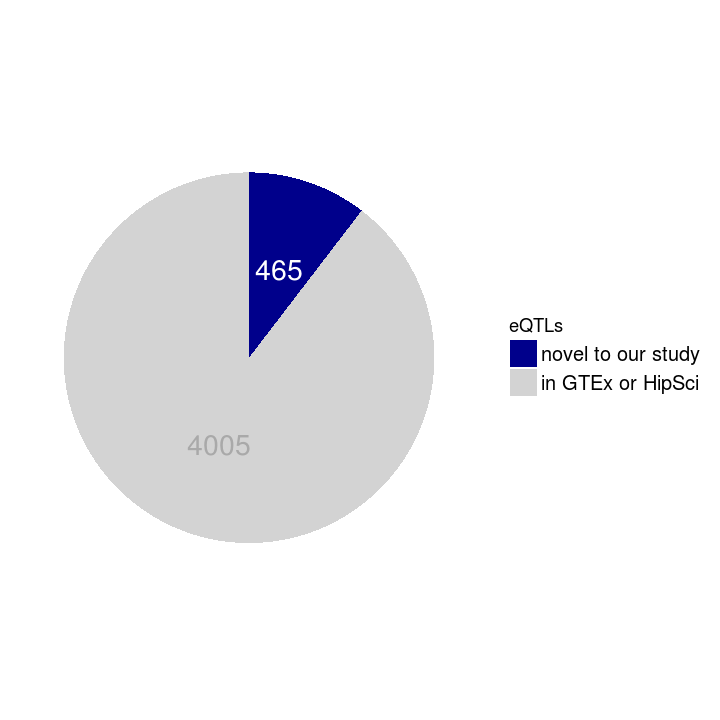

In [111]:
options(repr.plot.width = 6, repr.plot.height = 6)
df <- data.frame(
  eQTLs = as.factor(c("novel to our study", "in GTEx or HipSci")),
  value = c(465, 4470-465)
  )
df$eQTLs = factor(df$eQTLs, levels(df$eQTLs)[c(2,1)])
bp <- ggplot(df, aes(x = "", y = value, fill = eQTLs)) + geom_bar(width = 1, stat = "identity")
pie <- bp + coord_polar("y", start = 0, direction = -1)

blank_theme <- theme_minimal()+
  theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid = element_blank(),
  axis.ticks = element_blank()
  )

library(scales)
pie +  scale_fill_manual(values = c("darkblue", "lightgrey")) + 
    blank_theme + theme(axis.text.x = element_blank(), legend.text = element_text(size=12))  +
    geom_text(aes(label = value), position = position_stack(vjust = 0.5),
             size = 6, col = c("darkgrey", "white"))

In [80]:
non_gtex$ensembl_id = gsub("*_.*","",non_gtex$feature)
non_gtex$eqtls_ens = paste0(non_gtex$ensembl_id,"-",non_gtex$snp_id)

In [81]:
head(non_gtex$eqtls_ens)

[1] "ENSG00000185046-12_99262556_G_A" "ENSG00000142173-21_47519720_A_G"
[3] "ENSG00000186439-6_123904601_C_T" "ENSG00000077942-22_45898592_G_C"
[5] "ENSG00000170989-1_101636948_A_G" "ENSG00000171843-9_20626809_A_T"

In [41]:
all.ips = read.table("/hps/nobackup/stegle/users/mjbonder/Full_Results_Primary_Round_0.05.txt.gz", header = T, sep = "\t", as.is = T)
all.ips$ensembl_gene_id = all.ips$feature

In [53]:
all.ips$eqtls_ens = paste0(all.ips$ensembl_gene_id,"-",all.ips$snp_id)

In [55]:
all.ips.sign = all.ips[all.ips$corr_p_value < 0.1,]

In [48]:
nrow(all.ips)
nrow(all.ips.sign)

[1] 21223333

[1] 2217329

In [56]:
head(all.ips.sign$eqtls_ens)
head(non_gtex$eqtls_ens)

[1] "ENSG00000204525-6_31237124_T_C" "ENSG00000204525-6_31236316_G_T"
[3] "ENSG00000204525-6_31236339_T_C" "ENSG00000204525-6_31237333_T_A"
[5] "ENSG00000204525-6_31237323_A_G" "ENSG00000204525-6_31237162_C_G"

[1] "ENSG00000176654-12_7945196_G_T"  "ENSG00000144476-2_237451480_T_G"
[3] "ENSG00000185046-12_99262556_G_A" "ENSG00000204347-17_72328361_G_T"
[5] "ENSG00000183421-21_43134878_G_A" "ENSG00000142173-21_47519720_A_G"

In [65]:
sum(all.ips.sign$eqtls_ens %in% non_gtex[non_gtex$stage == "ips","eqtls_ens"])
sum(all.ips.sign$eqtls_ens %in% non_gtex[non_gtex$stage == "mesendo","eqtls_ens"])
sum(all.ips.sign$eqtls_ens %in% non_gtex[non_gtex$stage == "defendo","eqtls_ens"])

[1] 114

[1] 79

[1] 50

In [11]:
# load sceset
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [12]:
# normalize
sce <- normalize(sce)
# define design matrix with batch structure (experiment)
design <- model.matrix(~experiment, data = colData(sce))
# define highly variable genes
alt.fit <- trendVar(sce, design = design, use.spikes = FALSE)
alt.decomp <- decomposeVar(sce, alt.fit)

Warning message in .local(object, ...):
“spike-in transcripts in 'ERCC' should have their own size factors”

In [13]:
# get top 500
top.500.hvgs <- rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),][1:500,])

In [82]:
# get PC1 from expression of the top 500 hvgs
sce_500hvg = sce[rownames(sce) %in% top.500.hvgs,]
p1 = as.data.frame(prcomp(t(logcounts(sce_500hvg)))$x[,1])
colnames(p1) = "PC1_top500hvgs"
head(p1)

,PC1_top500hvgs
21843_1#10,-11.7695261
21843_1#100,5.1315308
21843_1#101,-0.6430211
21843_1#102,-14.5080208
21843_1#103,-5.8029849
21843_1#105,-2.3442226


In [83]:
sce$pc1top500hvgs = p1$PC1_top500hvgs
sce_defendo = sce[, sce$day %in% c("day2","day3") & sce$pc1top500hvgs > 22]

In [84]:
genes_avg_expr = rowMeans(logcounts(sce_defendo)[rownames(sce_defendo) %in% non_gtex[non_gtex$stage == "defendo","feature"],])
df = as.data.frame(genes_avg_expr[order(genes_avg_expr, decreasing = T)])
colnames(df) = "sc.avg.expr.defendo"
df$feature = rownames(df)
df_qtls = inner_join(df, non_gtex[non_gtex$stage == "defendo",c("snp_id","global_corr_p_value","beta.mean","feature")])
head(df_qtls)

Joining, by = "feature"


sc.avg.expr.defendo,feature,snp_id,global_corr_p_value,beta.mean
10.625707,ENSG00000123416_TUBA1B,12_49615940_A_T,0.084867232,-0.2881833
8.190559,ENSG00000135919_SERPINE2,2_224841784_G_A,0.071520443,0.4406297
8.007445,ENSG00000237550_UBE2Q2P6,15_82629929_A_G,0.054657290,-0.6010698
7.885199,ENSG00000077942_FBLN1,22_45898592_G_C,0.001038239,0.4505297
7.662594,ENSG00000196591_HDAC2,6_114157044_T_C,0.080658608,-0.2832708
7.634360,ENSG00000042753_AP2S1,19_47412622_C_T,0.053525604,-0.5132971


In [85]:
nrow(non_gtex[non_gtex$stage == "ips",])

[1] 120

In [86]:
defendo_nogtex_eqtls = df_qtls

In [87]:
nrow(defendo_nogtex_eqtls)

[1] 145

In [20]:
write.csv(defendo_nogtex_eqtls, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/results_files_20181031/eQTL_results_dfs/defendo_eqtls_not_in_gtex_w_avg_expr.csv")

In [88]:
sce_mesendo = sce[, sce$day %in% c("day1","day2") & sce$pc1top500hvgs > -23 & sce$pc1top500hvgs < 4]

In [89]:
genes_avg_expr = rowMeans(logcounts(sce_mesendo)[rownames(sce_mesendo) %in% non_gtex[non_gtex$stage == "mesendo","feature"],])
df = as.data.frame(genes_avg_expr[order(genes_avg_expr, decreasing = T)])
colnames(df) = "sc.avg.expr.mesendo"
df$feature = rownames(df)
df_qtls = inner_join(df, non_gtex[non_gtex$stage == "mesendo",c("snp_id","global_corr_p_value","beta.mean","feature")])
head(df_qtls)

Joining, by = "feature"


sc.avg.expr.mesendo,feature,snp_id,global_corr_p_value,beta.mean
9.478985,ENSG00000096384_HSP90AB1,6_44210736_T_C,0.09062838,-0.1770306
9.196007,ENSG00000127184_COX7C,5_85945655_T_C,0.08335967,-0.2692534
7.826388,ENSG00000196419_XRCC6,22_42045141_A_T,0.05883148,0.2395401
7.051493,ENSG00000109861_CTSC,11_87938505_A_G,0.08417327,-0.2463607
6.919883,ENSG00000115758_ODC1,2_10627860_G_T,0.03666916,-0.4832575
6.686277,ENSG00000131876_SNRPA1,15_101747869_C_A,0.04701282,0.3508244


In [90]:
mesendo_nogtex_eqtls = df_qtls

In [91]:
nrow(mesendo_nogtex_eqtls)

[1] 207

In [22]:
write.csv(mesendo_nogtex_eqtls, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/results_files_20181031/eQTL_results_dfs/mesendo_eqtls_not_in_gtex_w_avg_expr.csv")

In [92]:
non_gtex_gwastag = non_gtex[non_gtex$GWAS_LD != "-",]
non_gtex_gwastag[,c("feature","snp_id","stage","beta.mean","p_value.mean","global_corr_p_value",
                    "GWAS_LD","GWAS_Annotation","GWAS_Variant")]

,feature,snp_id,stage,beta.mean,p_value.mean,global_corr_p_value,GWAS_LD,GWAS_Annotation,GWAS_Variant
74,ENSG00000170989_S1PR1,1_101636948_A_G,defendo,-0.3993355,1.069797e-05,0.00610508,{1.0000000000000002},"{http://www.ebi.ac.uk/efo/EFO_0004503, http://www.ebi.ac.uk/efo/EFO_0004833, http://www.ebi.ac.uk/efo/EFO_0004842, http://www.ebi.ac.uk/efo/EFO_0001444, http://purl.obolibrary.org/obo/IAO_0000030, http://www.ebi.ac.uk/efo/EFO_0005090, http://www.ebi.ac.uk/efo/EFO_0007988, http://www.ebi.ac.uk/efo/EFO_0004308, http://www.ebi.ac.uk/efo/EFO_0007996, http://www.ebi.ac.uk/efo/EFO_0007987, http://www.ebi.ac.uk/efo/EFO_0000001, http://www.ebi.ac.uk/efo/EFO_0007994}",{1_101625883}
1600,ENSG00000131876_SNRPA1,15_101747869_C_A,mesendo,0.3508244,7.258170e-03,0.04701282,{0.8236985868204074};{0.8208190918217556},"{http://www.ebi.ac.uk/efo/EFO_0004833, http://www.ebi.ac.uk/efo/EFO_0004503, http://www.ebi.ac.uk/efo/EFO_0007990, http://www.ebi.ac.uk/efo/EFO_0001444, http://purl.obolibrary.org/obo/IAO_0000030, http://www.ebi.ac.uk/efo/EFO_0004842, http://www.ebi.ac.uk/efo/EFO_0005090, http://www.ebi.ac.uk/efo/EFO_0007988, http://www.ebi.ac.uk/efo/EFO_0004308, http://www.ebi.ac.uk/efo/EFO_0007987, http://www.ebi.ac.uk/efo/EFO_0000001};{http://www.ebi.ac.uk/efo/EFO_0004503, http://www.ebi.ac.uk/efo/EFO_0001444, http://purl.obolibrary.org/obo/IAO_0000030, http://www.ebi.ac.uk/efo/EFO_0007989, http://www.ebi.ac.uk/efo/EFO_0005091, http://www.ebi.ac.uk/efo/EFO_0007988, http://www.ebi.ac.uk/efo/EFO_0004308, http://www.ebi.ac.uk/efo/EFO_0007987, http://www.ebi.ac.uk/efo/EFO_0007997, http://www.ebi.ac.uk/efo/EFO_0000001}",{15_101723499};{15_101716797}
2868,ENSG00000174738_NR1D2,3_23962646_A_G,ips,-0.3497036,2.305234e-05,0.01719039,{0.9999999999999998};{0.9068906956927254};{0.9922091471387251},"{http://www.ebi.ac.uk/efo/EFO_0004337, http://purl.obolibrary.org/obo/GO_0008150, http://www.ebi.ac.uk/efo/EFO_0003925, http://www.ifomis.org/bfo/1.1/span#ProcessualEntity, http://www.ebi.ac.uk/efo/EFO_0004323, http://www.ebi.ac.uk/efo/EFO_0000001};{http://www.ebi.ac.uk/efo/EFO_0004337, http://purl.obolibrary.org/obo/GO_0008150, http://www.ebi.ac.uk/efo/EFO_0003925, http://www.ifomis.org/bfo/1.1/span#ProcessualEntity, http://www.ebi.ac.uk/efo/EFO_0004323, http://www.ebi.ac.uk/efo/EFO_0000001};{http://www.ebi.ac.uk/efo/EFO_0004337, http://purl.obolibrary.org/obo/GO_0008150, http://www.ebi.ac.uk/efo/EFO_0003925, http://www.ifomis.org/bfo/1.1/span#ProcessualEntity, http://www.ebi.ac.uk/efo/EFO_0004323, http://www.ebi.ac.uk/efo/EFO_0000001}",{3_23962646};{3_24015140};{3_23966425}
3111,ENSG00000054282_SDCCAG8,1_243650716_T_C,mesendo,-0.3990683,6.033067e-04,0.08885014,{0.9289564020419747},"{http://www.ebi.ac.uk/efo/EFO_0000677, http://www.ifomis.org/bfo/1.1/snap#SpecificallyDependentContinuant, http://www.ebi.ac.uk/efo/EFO_0000408, http://www.ifomis.org/bfo/1.1/snap#Disposition, http://www.ebi.ac.uk/efo/EFO_0000001, http://www.ebi.ac.uk/efo/EFO_0000692}",{1_243663893}
3275,ENSG00000143013_LMO4,1_87705872_G_A,ips,-0.3958900,1.358835e-04,0.09472800,{0.995680577353884};{0.995680577353884};{0.8155267121891658},"{http://www.ebi.ac.uk/efo/EFO_0004503, http://www.ebi.ac.uk/efo/EFO_0001444, http://purl.obolibrary.org/obo/IAO_0000030, http://www.ebi.ac.uk/efo/EFO_0005090, http://www.ebi.ac.uk/efo/EFO_0007988, http://www.ebi.ac.uk/efo/EFO_0004308, http://www.ebi.ac.uk/efo/EFO_0007987, http://www.ebi.ac.uk/efo/EFO_0000001};{http://www.ebi.ac.uk/efo/EFO_0004503, http://www.ebi.ac.uk/efo/EFO_0001444, http://purl.obolibrary.org/obo/IAO_0000030, http://www.ebi.ac.uk/efo/EFO_0005090, http://www.ebi.ac.uk/efo/EFO_0007988, http://www.ebi.ac.uk/efo/EFO_0004308, http://www.ebi.ac.uk/efo/EFO_0007995, http://www.ebi.ac.uk/efo/EFO_0007987, http://www.ebi.ac.uk/efo/EFO_0007992, http://www.ebi.ac.uk/efo/EFO_0000001};{http://www.ebi.ac.uk/efo/EFO_0004503, http://www.ebi.ac.uk/efo/EFO_0004842, http://www.ebi.ac.uk/efo/EFO_0001444, http://purl.obolibrary.org/obo/IAO_0000030, http://www.ebi.a

In [24]:
res.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/allresults.csv", row.names = 1)
res.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/allresults.csv", row.names = 1)
res.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/allresults.csv", row.names = 1)

In [ ]:
## S1PR1 - defendo
# {basophil count, eosinophil count}, {eosinophil count}, {neutrophil percentage of granulocytes}, 
# {eosinophil percentage of granulocytes}

## SNRPA1 - mesendo
# SNP1
# {myeloid white cell count}, {neutrophil count, eosinophil count}, {granulocyte count}, {neutrophil count}, 
#{neutrophil count, basophil count}, {neutrophil percentage of leukocytes} 
# SNP2
# {monocyte percentage of leukocytes}, {granulocyte percentage of myeloid white cells}

## NR1D2 - ips
# SNP1
# {intelligence}
# SNP2
# {intelligence}
# SNP3
# {intelligence}

## SDCCAG8 - mesendo
# {schizophrenia}

## LMO4 - ips
# SNP1
# {basophil count}
# SNP2
# {basophil percentage of granulocytes}, {basophil count}, {basophil percentage of leukocytes}
# SNP3
# {basophil count, eosinophil count}, {eosinophil count}, {eosinophil percentage of granulocytes}, 
# {eosinophil percentage of leukocytes}

[1] 1


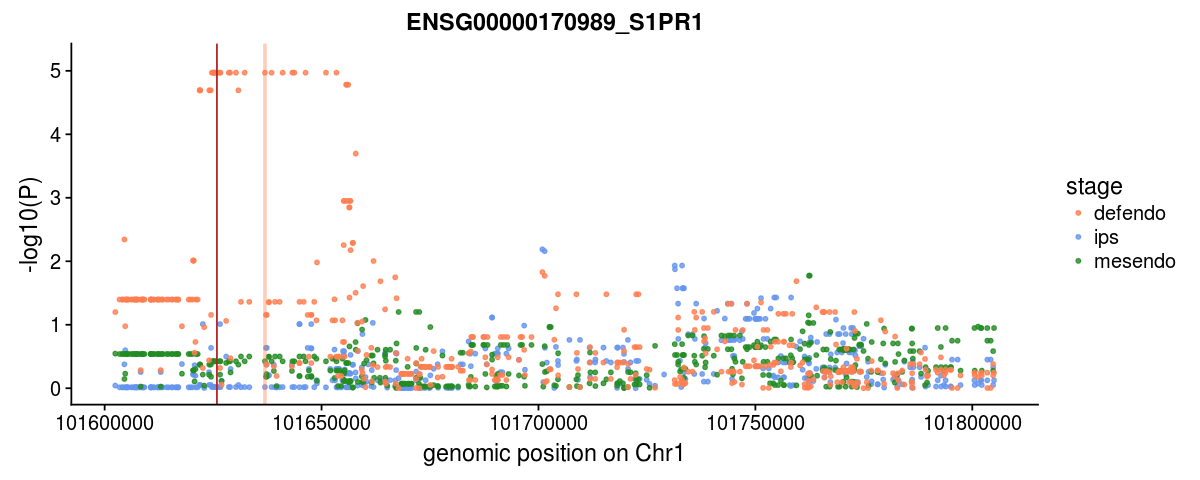

[1] 2


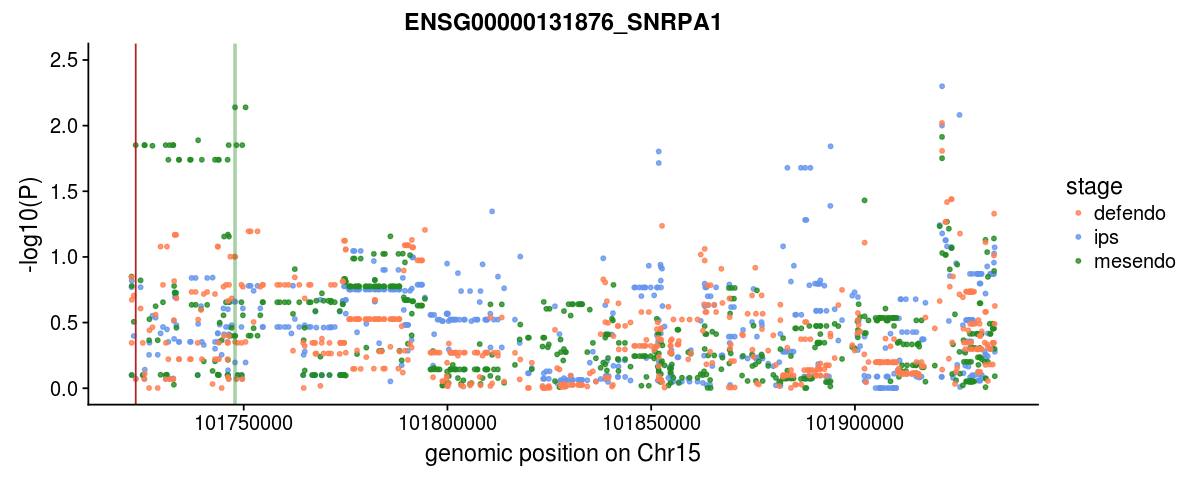

[1] 3


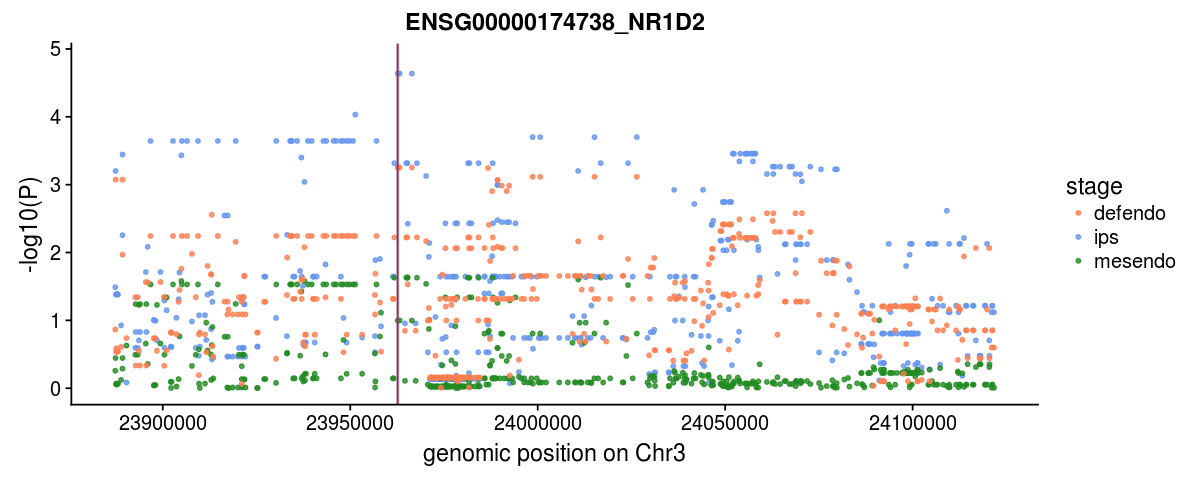

[1] 4


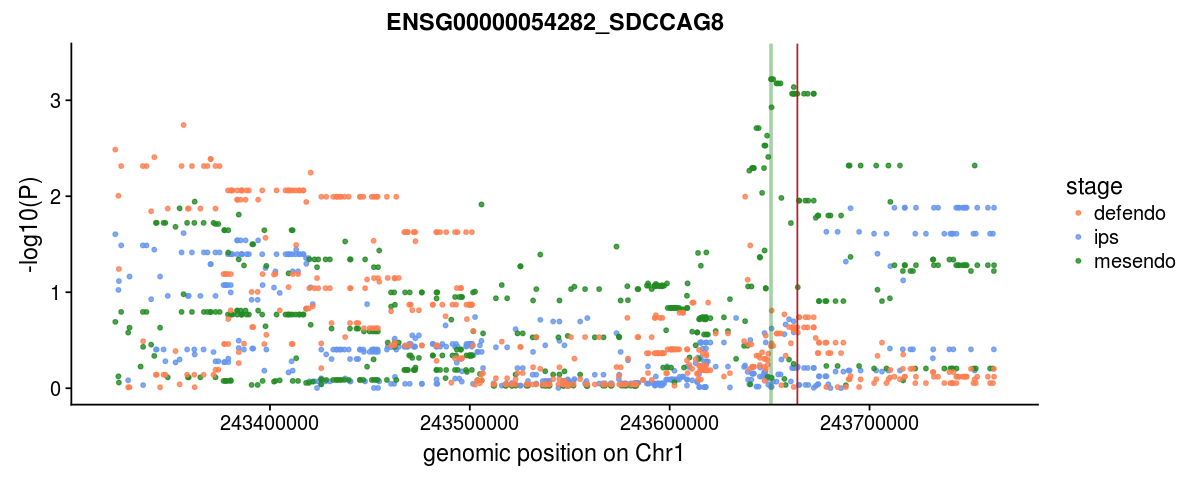

[1] 5


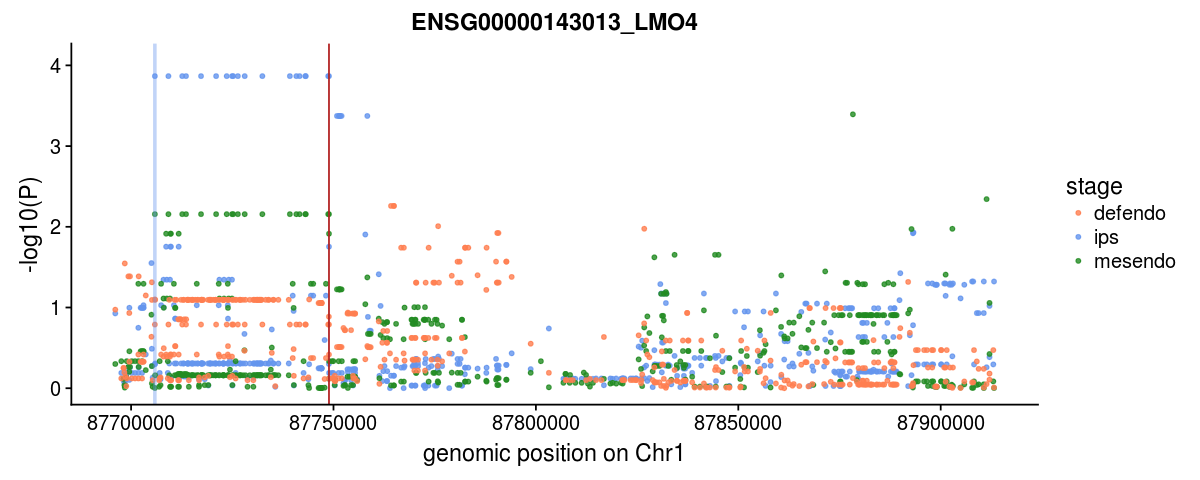

In [93]:
for (i in 1:nrow(non_gtex_gwastag)){
# for (i in 2){
#     if (i %in% c(4)){ next }
    gene = non_gtex_gwastag$feature[i]
    res = non_gtex_gwastag[non_gtex_gwastag$feature == gene,]
    df0 = res.ips[res.ips$feature == gene,]
    df0$stage = "ips"
    # head(df0)
    df1 = res.mes[res.mes$feature == gene,]
    df1$stage = "mesendo"
    # head(df1)
    df2 = res.defendo[res.defendo$feature == gene,]
    df2$stage = "defendo"
    # head(df2)
    df = rbind(df0,df1,df2)
    # head(df)
    m = min(df$p_value)
    p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
    p = p + geom_point(size = 1, alpha = 0.8)  
    p = p + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
    p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
    p = p + ylim(c(0,-log10(m)+0.2))
    p = p + ggtitle(gene)
    p = p + geom_vline(xintercept = res[res$stage == "defendo","snp_position"], col = "coral", alpha = 0.4, size = 1)
    p = p + geom_vline(xintercept = res[res$stage == "mesendo","snp_position"], col = "forestgreen", alpha = 0.4, size = 1)
    p = p + geom_vline(xintercept = res[res$stage == "ips","snp_position"], col = "cornflowerblue", alpha = 0.4, size = 1)
    gwas_pos1 = gsub("\\}","",gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[,"GWAS_Variant"],";"))[1])))
    p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
    options(repr.plot.width = 10, repr.plot.height = 4)
    print(p)
    print (i)
}


In [30]:
########### GWAS tagging dynamic eQTLs (pseudotime)

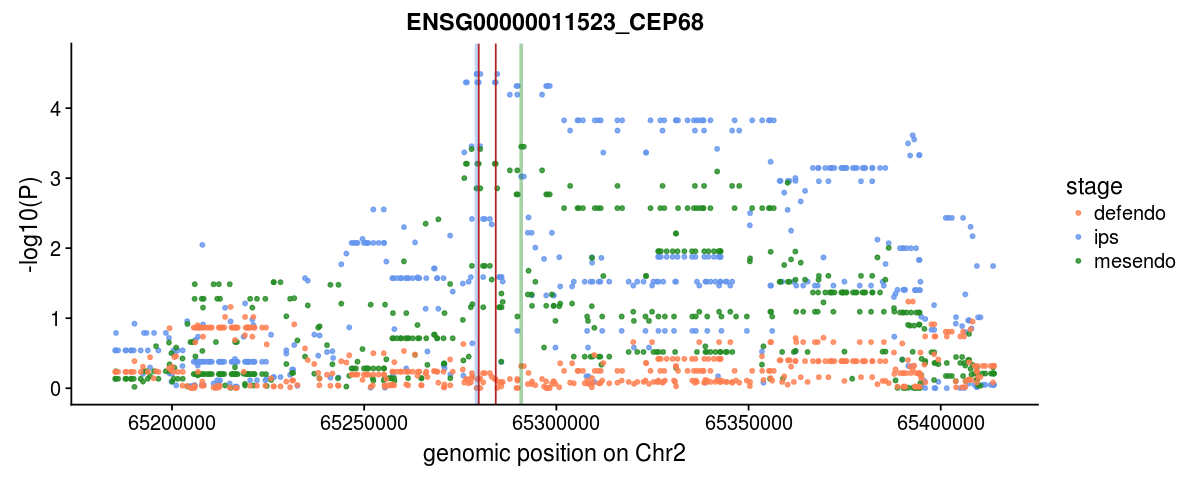

In [36]:
# {atrial fibrillation}
gene = "ENSG00000011523_CEP68"
res = gtex_tagging[gtex_tagging$feature == gene,]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
# head(df0)
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
# head(df1)
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
# head(df2)
df = rbind(df0,df1,df2)
# head(df)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
p = p + geom_point(size = 1, alpha = 0.8)  
p = p + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+0.2))
p = p + ggtitle(gene)
p = p + geom_vline(xintercept = res[res$stage == "defendo","snp_position"], col = "coral", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "mesendo","snp_position"], col = "forestgreen", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "ips","snp_position"], col = "cornflowerblue", alpha = 0.4, size = 1)
gwas_pos1 = gsub("\\}","",gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[,"GWAS_Variant"],";"))[1])))
gwas_pos2 = gsub("\\}","",gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[,"GWAS_Variant"],";"))[2])))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
p = p + geom_vline(xintercept = as.numeric(gwas_pos2), col = "firebrick", size = 0.5)
options(repr.plot.width = 10, repr.plot.height = 4)
p

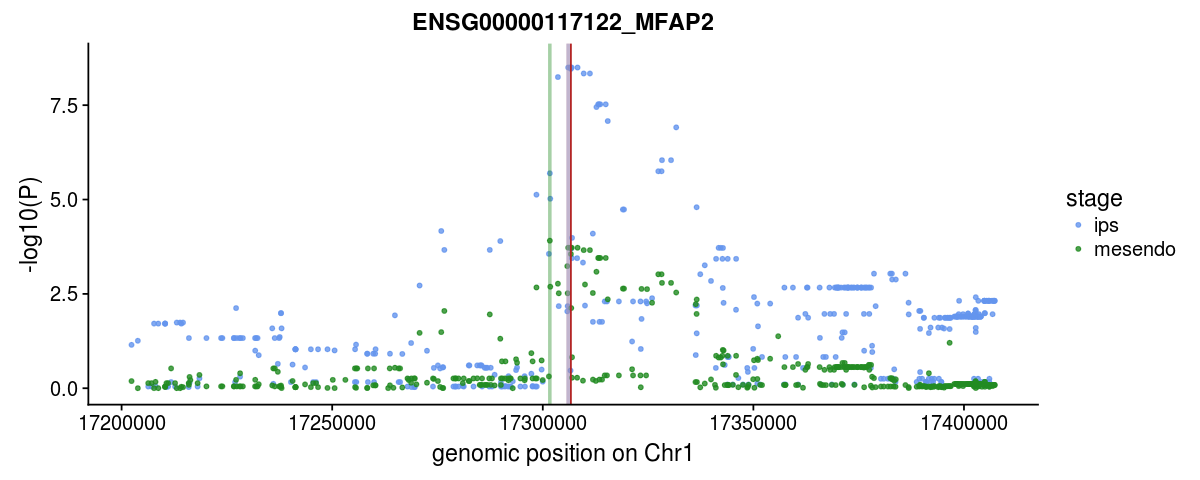

In [33]:
# {FEV/FEC ratio}, {pulmonary function measurement, smoking behaviour measurement, FEV/FEC ratio}, 
# {body height}, {pulmonary function measurement, FEV/FEC ratio}
gene = "ENSG00000117122_MFAP2"
res = gtex_tagging[gtex_tagging$feature == gene,]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df = rbind(df0,df1)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
p = p + geom_point(size = 1, alpha = 0.8)  
p = p + scale_colour_manual(values = c("cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+0.2))
p = p + ggtitle(gene)
p = p + geom_vline(xintercept = res[res$stage == "defendo","snp_position"], col = "coral", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "mesendo","snp_position"], col = "forestgreen", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "ips","snp_position"], col = "cornflowerblue", alpha = 0.4, size = 1)
gwas_pos1 = gsub("\\}","",gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[,"GWAS_Variant"],";"))[1])))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
options(repr.plot.width = 10, repr.plot.height = 4)
p

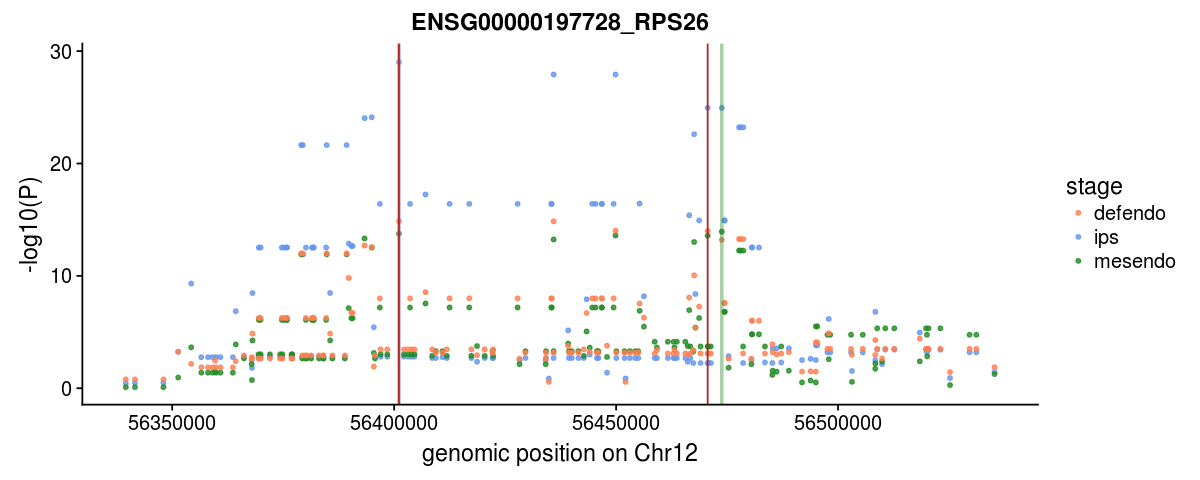

In [45]:
# {type I diabetes mellitus}
gene = "ENSG00000197728_RPS26"
res = gtex_tagging[gtex_tagging$feature == gene,]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
# head(df0)
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
# head(df1)
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
# head(df2)
df = rbind(df0,df1,df2)
# head(df)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
p = p + geom_point(size = 1, alpha = 0.8)  
p = p + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+0.2))
p = p + ggtitle(gene)
p = p + geom_vline(xintercept = res[res$stage == "defendo","snp_position"], col = "coral", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "mesendo","snp_position"], col = "forestgreen", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "ips","snp_position"], col = "cornflowerblue", alpha = 0.4, size = 1)
gwas_pos1 = gsub("\\}","",gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[,"GWAS_Variant"],";"))[1])))
gwas_pos3 = gsub("\\}","",gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[,"GWAS_Variant"],";"))[3])))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
p = p + geom_vline(xintercept = as.numeric(gwas_pos3), col = "firebrick", size = 0.5)
options(repr.plot.width = 10, repr.plot.height = 4)
p

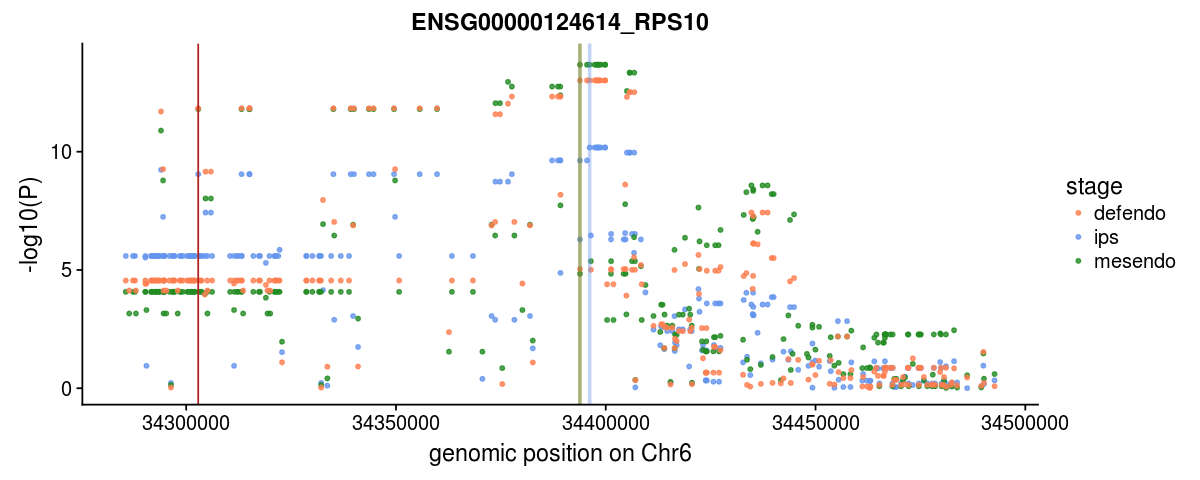

In [46]:
gene = "ENSG00000124614_RPS10"
res = gtex_tagging[gtex_tagging$feature == gene,]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
# head(df0)
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
# head(df1)
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
# head(df2)
df = rbind(df0,df1,df2)
# head(df)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
p = p + geom_point(size = 1, alpha = 0.8)  
p = p + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+0.2))
p = p + ggtitle(gene)
p = p + geom_vline(xintercept = res[res$stage == "defendo","snp_position"], col = "coral", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "mesendo","snp_position"], col = "forestgreen", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "ips","snp_position"], col = "cornflowerblue", alpha = 0.4, size = 1)
gwas_pos1 = gsub("\\}","",gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[,"GWAS_Variant"],";"))[1])))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
options(repr.plot.width = 10, repr.plot.height = 4)
p

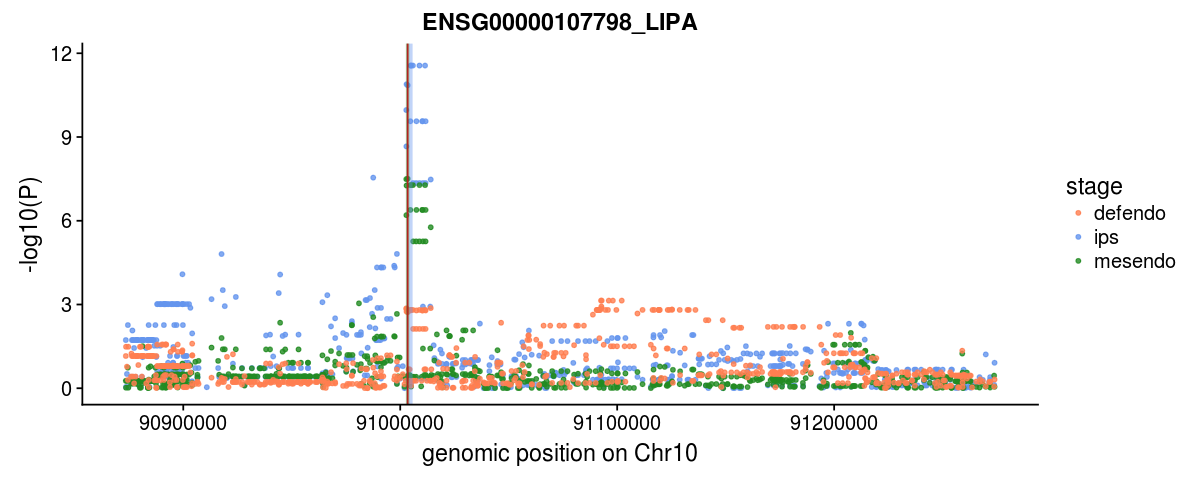

In [51]:
gene = "ENSG00000107798_LIPA"
res = gtex_tagging[gtex_tagging$feature == gene,]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
# head(df0)
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
# head(df1)
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
# head(df2)
df = rbind(df0,df1,df2)
# head(df)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
p = p + geom_point(size = 1, alpha = 0.8)  
p = p + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+0.2))
p = p + ggtitle(gene)
p = p + geom_vline(xintercept = res[res$stage == "defendo","snp_position"], col = "coral", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "mesendo","snp_position"], col = "forestgreen", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "ips","snp_position"], col = "cornflowerblue", alpha = 0.4, size = 1)
gwas_pos1 = gsub("\\}","",gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[,"GWAS_Variant"],";"))[1])))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
# gwas_pos2 = gsub("\\}","",gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[,"GWAS_Variant"],";"))[2])))
# p = p + geom_vline(xintercept = as.numeric(gwas_pos2), col = "firebrick", size = 0.5)
# gwas_pos3 = gsub("\\}","",gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[,"GWAS_Variant"],";"))[3])))
# p = p + geom_vline(xintercept = as.numeric(gwas_pos3), col = "firebrick", size = 0.5)
# gwas_pos4 = gsub("\\}","",gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[,"GWAS_Variant"],";"))[4])))
# p = p + geom_vline(xintercept = as.numeric(gwas_pos4), col = "firebrick", size = 0.5)
# gwas_pos5 = gsub("\\}","",gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[,"GWAS_Variant"],";"))[5])))
# p = p + geom_vline(xintercept = as.numeric(gwas_pos5), col = "firebrick", size = 0.5)
options(repr.plot.width = 10, repr.plot.height = 4)
p

Warning message in data.frame(xintercept = xintercept):
“NAs introduced by coercion”Warning message:
“Removed 1 rows containing missing values (geom_vline).”

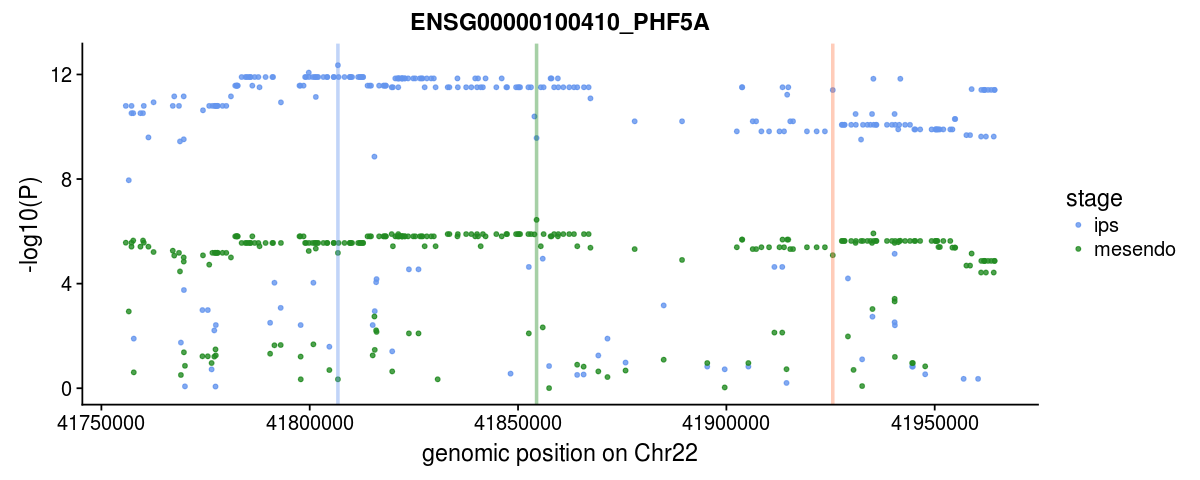

In [29]:
# {Crohn's disease} - Respiration
gene = "ENSG00000100410_PHF5A"
res = gtex_tagging[gtex_tagging$feature == gene,]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
# head(df0)
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
# head(df2)
df = rbind(df0,df1)
# head(df)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
p = p + geom_point(size = 1, alpha = 0.8)  
p = p + scale_colour_manual(values = c("cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+0.2))
p = p + ggtitle(gene)
p = p + geom_vline(xintercept = res[res$stage == "defendo","snp_position"], col = "coral", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "mesendo","snp_position"], col = "forestgreen", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "ips","snp_position"], col = "cornflowerblue", alpha = 0.4, size = 1)
gwas_pos1 = gsub("\\}","",gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[,"GWAS_Variant"],";"))[1])))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
options(repr.plot.width = 10, repr.plot.height = 4)
p

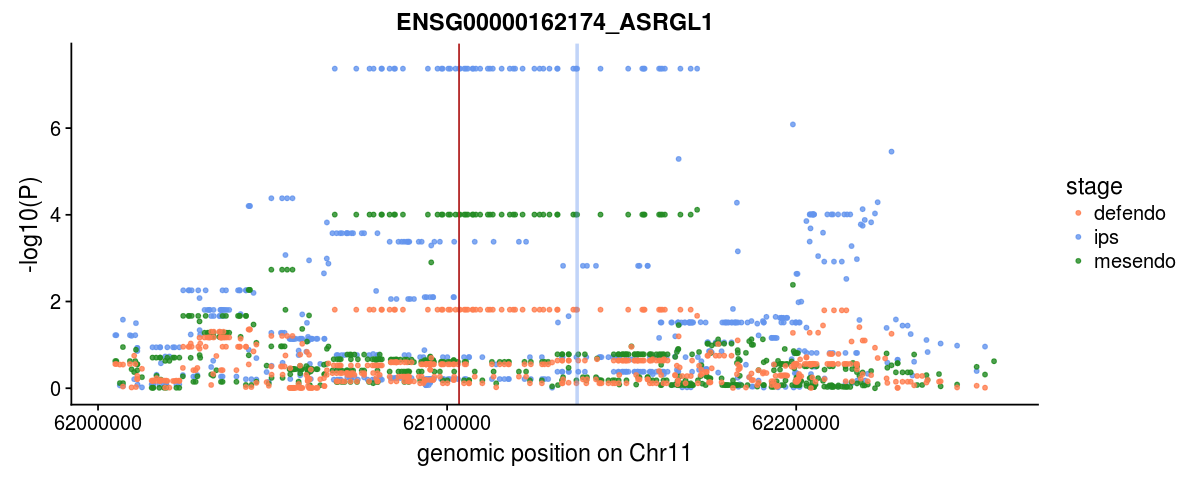

In [26]:
# {chronic obstructive pulmonary disease, CC16 measurement} - G1/S transition
gene = "ENSG00000162174_ASRGL1"
res = gtex_tagging[gtex_tagging$feature == gene,]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
# head(df0)
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
# head(df1)
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
# head(df2)
df = rbind(df0,df1,df2)
# head(df)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
p = p + geom_point(size = 1, alpha = 0.8)  
p = p + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+0.2))
p = p + ggtitle(gene)
p = p + geom_vline(xintercept = res[res$stage == "defendo","snp_position"], col = "coral", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "mesendo","snp_position"], col = "forestgreen", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "ips","snp_position"], col = "cornflowerblue", alpha = 0.4, size = 1)
gwas_pos1 = gsub("\\}","",gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[,"GWAS_Variant"],";"))[1])))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
options(repr.plot.width = 10, repr.plot.height = 4)
p

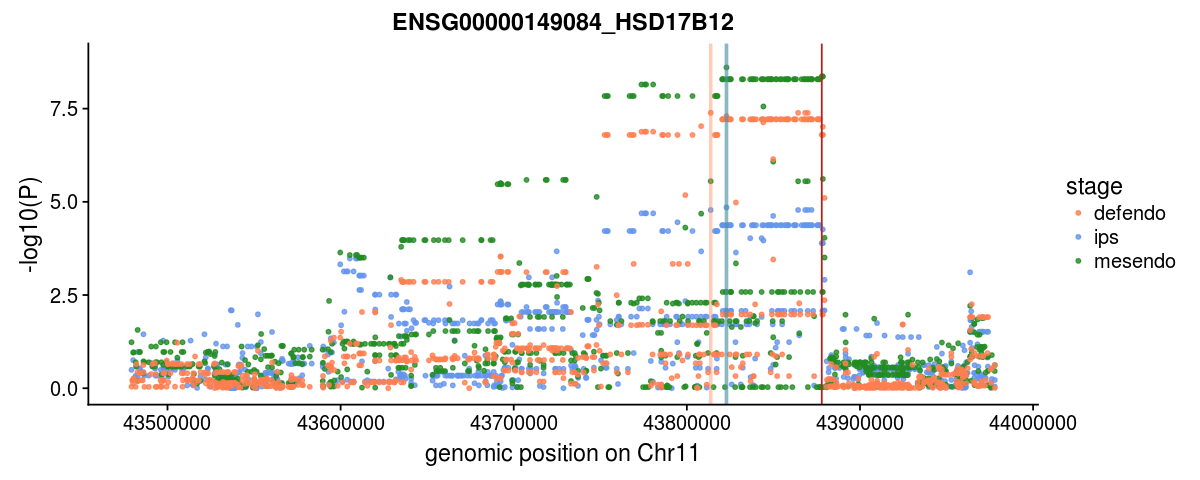

In [27]:
# {type II diabetes mellitus} - G1/S transition & G2/M transition
gene = "ENSG00000149084_HSD17B12"
res = gtex_tagging[gtex_tagging$feature == gene,]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
# head(df0)
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
# head(df1)
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
# head(df2)
df = rbind(df0,df1,df2)
# head(df)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
p = p + geom_point(size = 1, alpha = 0.8)  
p = p + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+0.2))
p = p + ggtitle(gene)
p = p + geom_vline(xintercept = res[res$stage == "defendo","snp_position"], col = "coral", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "mesendo","snp_position"], col = "forestgreen", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "ips","snp_position"], col = "cornflowerblue", alpha = 0.4, size = 1)
gwas_pos1 = gsub("\\}","",gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[,"GWAS_Variant"],";"))[1])))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
options(repr.plot.width = 10, repr.plot.height = 4)
p

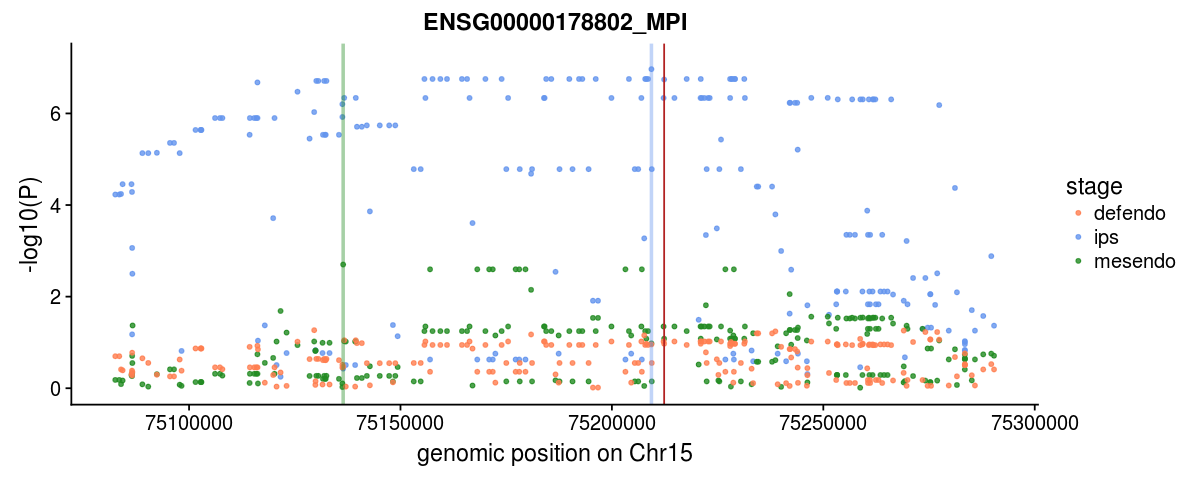

In [28]:
# {systolic blood pressure, alcohol consumption measurement} - G2/M transition
gene = "ENSG00000178802_MPI"
res = gtex_tagging[gtex_tagging$feature == gene,]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
# head(df0)
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
# head(df1)
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
# head(df2)
df = rbind(df0,df1,df2)
# head(df)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
p = p + geom_point(size = 1, alpha = 0.8)  
p = p + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+0.2))
p = p + ggtitle(gene)
p = p + geom_vline(xintercept = res[res$stage == "defendo","snp_position"], col = "coral", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "mesendo","snp_position"], col = "forestgreen", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "ips","snp_position"], col = "cornflowerblue", alpha = 0.4, size = 1)
gwas_pos1 = gsub("\\}","",gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[,"GWAS_Variant"],";"))[1])))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
options(repr.plot.width = 10, repr.plot.height = 4)
p

In [ ]:
10_91002927	{coronary heart disease}, {coronary artery disease}
10_91003419	{myocardial infarction}
10_91004886	{coronary artery disease}
10_91004916	{neutrophil count}, {neutrophil count, eosinophil count}
10_91008879	{fibrinogen measurement}

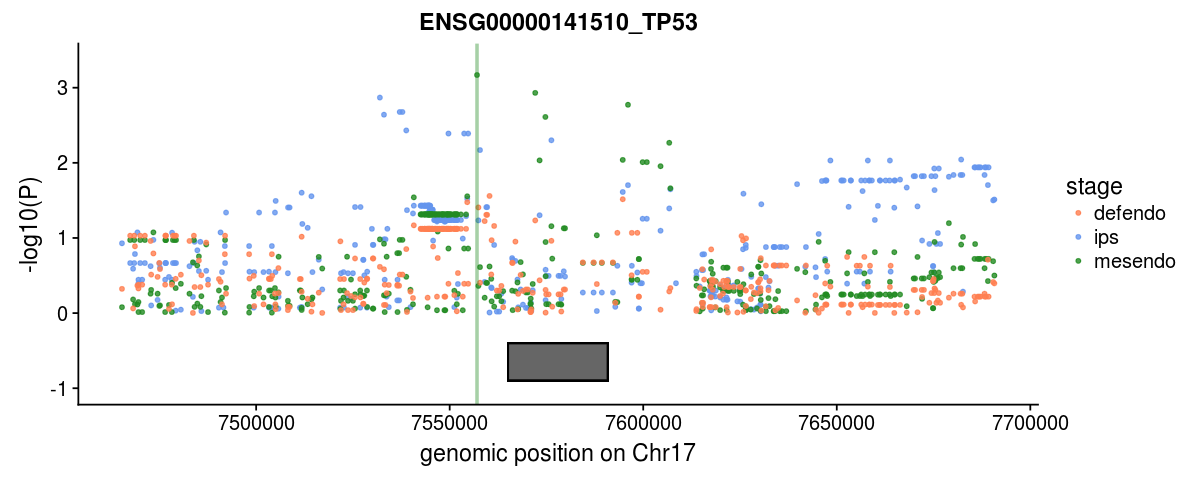

In [115]:
# TP53 gene (non GWAS tagging, interesting gene)
gene = "ENSG00000141510_TP53"
res = gtex_tagging[gtex_tagging$feature == gene,]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
# head(df0)
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
# head(df1)
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
# head(df2)
df = rbind(df0,df1,df2)
# head(df)
m = min(df$p_value)
gene_start = 7565097
gene_end = 7590856
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
p = p + geom_point(size = 1, alpha = 0.8)  
p = p + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(-1,-log10(m)+0.2))
p = p + ggtitle(gene)
p = p + geom_vline(xintercept = res[res$stage == "defendo","snp_position"], col = "coral", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "mesendo","snp_position"], col = "forestgreen", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "ips","snp_position"], col = "cornflowerblue", alpha = 0.4, size = 1)
p = p + geom_rect(mapping = aes(xmin = gene_start, xmax = gene_end, ymin = -0.9, ymax = -0.4), 
                  color = "black", alpha = 0.1, fill = "dimgrey")
options(repr.plot.width = 10, repr.plot.height = 4)
p